Imports

In [1]:
import pandas as pd
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  
from sklearn.preprocessing import StandardScaler
from joblib import dump, load
from sklearn.ensemble import RandomForestClassifier

Methods to process Data

In [2]:
def toInt(y):
    try:
        return int(y)
    except ValueError as ve:
        return 0

def mean(x):
    if isinstance(x, list):
        return sum([toInt(y) for y in x])/2
    
def transf(x):
    if isinstance(x,float):
        return 0
    else:
        return 1

Load Data / Columns to use

In [3]:
dados = pd.read_csv("data/fake_job_postings.csv")
dados.head()
# company_profile,has_company_logo, has_questions

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


Slice data and process data

In [4]:
dados.drop(dados[dados.fraudulent == 0][:16000].index, inplace=True)
dados.fraudulent.value_counts()

dados.company_profile = dados.company_profile.apply(transf)

Visualization data

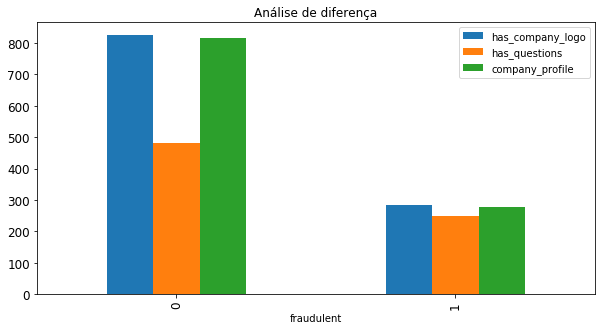

In [5]:
a = dados.groupby('fraudulent').sum().has_company_logo
a = pd.concat([a, dados.groupby('fraudulent').sum().has_questions], axis=1)
a = pd.concat([a, dados.groupby('fraudulent').sum().company_profile], axis=1)

a[['has_company_logo', 'has_questions','company_profile']].plot(kind='bar',title ="Análise de diferença", figsize=(10, 5), legend=True, fontsize=12)

Split XY Data

In [6]:
x = dados[['company_profile','has_company_logo', 'has_questions']]
y = dados["fraudulent"]

Scalling Data

In [7]:
# scaler = StandardScaler()

# company_profile = scaler.fit_transform( dados[['company_profile']])
# has_company_logo = scaler.fit_transform( dados[['has_company_logo']])
# has_questions = scaler.fit_transform( dados[['has_questions']])

# x.company_profile = company_profile
# x.has_company_logo = has_company_logo
# x.has_questions = has_questions

Split train/teste

In [8]:
np.random.seed(8)

treino_x, teste_x, treino_y, teste_y = train_test_split(x,y, test_size=0.25, stratify=y)

print("Treinaremos com %d elementos e testaremos com %d elementos " % (len(treino_x), len(teste_x)))

Treinaremos com 1410 elementos e testaremos com 470 elementos 


Aplly model

In [9]:
modelo1 = SVC()
modelo1.fit(treino_x, treino_y)

previsoes = modelo1.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes)*100
print("A acurácia foi de : %.2f%% " % acuracia)

A acurácia foi de : 75.96% 


Save Model

In [10]:
dump(modelo1, 'modelo_final.joblib') 

['modelo_final.joblib']

Load Model

In [11]:
modelo = load('modelo_final.joblib')

Predict new entry

In [12]:
modelo.predict([[0,0,0]])

array([1])